In [1]:
# if plotting does not work, change it into %matplotlib inline
# %matplotlib widget
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import display_array, normalise_clip
import deepdish as dd
from scipy.stats import zscore

# Loading the data

In [3]:
# load the imaging file from the folder "whole brain"
fps = 1.5
data_path = r"/mnt/c/Users/Cristina/Documents/SS19/lsmda/Portugues/traces_better_deconvolved.h5"
traces = dd.io.load(data_path) 

## Plotting the traces

(8917, 2430)

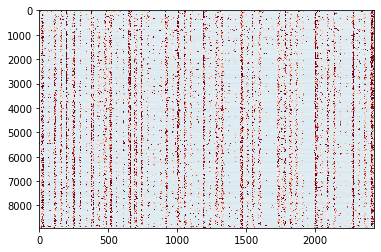

In [51]:
# Normalize the traces and plot them below as an image.
normalized_traces = zscore(traces,1)
plt.imshow(normalized_traces, aspect = 'auto', cmap='RdBu_r' ,vmin = -3, vmax = 3)
np.shape(traces)

# Averaging the traces over trials

In [57]:
# In the experiment from which the data was collected, there were 9 trials, the duration of each trial is 180 seconds. 
# To get a cleaner signal, average the traces over the 9 trials. Remember the sampling frequency of the data (1.5 Hz).
num_trials = 9
samples_per_trial = int(180*1.5)
n_samples = np.shape(traces)[1]
n_neurons = np.shape(traces)[0]

traces_reshaped = np.reshape(normalized_traces,(n_neurons,num_trials,samples_per_trial))
# print(traces_reshaped.shape)
average_traces = np.mean(traces_reshaped,1)
# print(np.shape(average_traces))
average_traces = np.nan_to_num(average_traces)

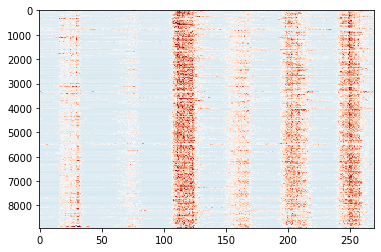

In [58]:
plt.imshow(average_traces, aspect = 'auto', cmap='RdBu_r', vmin=-3, vmax = 3)

You should get something like:

![](fig1_avg_traces.png)

# Dimensionality reduction and clustering 

## Dimensionality reduction (using PCA)

In [29]:
from sklearn.decomposition import PCA
import pandas as pd

In [59]:
# Run PCA over the average traces
pca = PCA(n_components=20)
pca.fit(average_traces)
print(pca.components_.shape)
print(pca.explained_variance_ratio_)

(20, 270)
[0.19179863 0.07270301 0.06599084 0.02705104 0.02642086 0.01749757
 0.01675153 0.01613294 0.01250911 0.0121365  0.01119683 0.01091001
 0.01037168 0.01023868 0.00972726 0.00949629 0.00910895 0.00895422
 0.00862102 0.00852148]


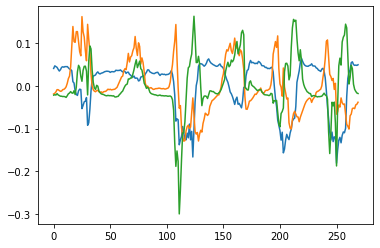

In [60]:
# Plot the first 3 PCs
PCs_3 = pca.components_[0:3,:]
plt.plot(PCs_3.T)
plt.show()

![](fig2_PCs.png)

## Explained variance plot

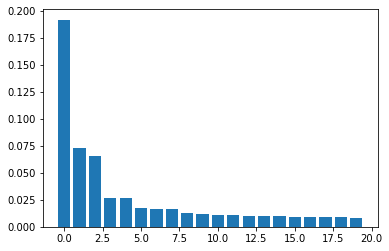

In [64]:
# To choose the number of PCs for the transformation of the data, create an explained variance plot.
# In this plot you will see the precentage of variance explained by each PC. Plot this only for the first 20 PCs. 
plt.bar(np.arange(20),pca.explained_variance_ratio_)
plt.show()

![](fig3_exp_var.png)

## Transformation of the data

(8917, 2)


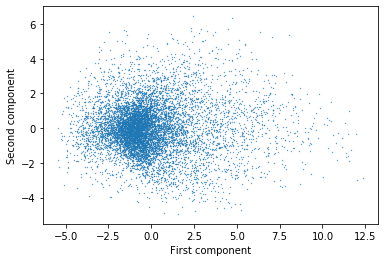

(8917, 2)


In [77]:
# Show the data in the PC space. 
num_pcs_to_use = 2
pca = PCA(n_components=num_pcs_to_use)
transform = pca.fit_transform(average_traces) # Gives the loadings
print(transform.shape)
plt.scatter(*zip(*(transform)), s=0.1)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()
print(np.shape(transform))

# Show the loading of the components in brain coordinates

Load the coords.h5 file and make a scatter plot in the x-y plane and x-z plane (coordinates 1 and 2 and 1 and 0 respectively)
showing the loading of the principal components (color-code the loading of principal components per cell)

(8917, 3)


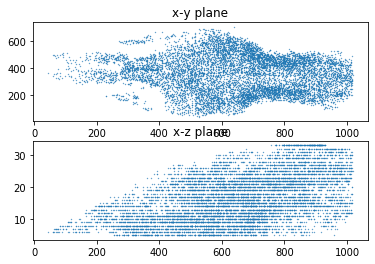

In [85]:
coordenates =  dd.io.load(r"/mnt/c/Users/Cristina/Documents/SS19/lsmda/Portugues/coords.h5")
print(coordenates.shape)
plt.subplot(211)
plt.scatter(coordenates[:,1],coordenates[:,2], s=0.1)
plt.title('x-y plane')
plt.subplot(212)
plt.scatter(coordenates[:,1],coordenates[:,0], s=0.1)
plt.title('x-z plane')
plt.show()

You should get somehting like this for the 2nd principal component:
    
![](pc_2.png)

Some jitter in the z coordinate has been added to show better the spatial distribution, otherwise the second plot would be cluttered in 30 layers.

Use the behavior and stimulus log to consider what the principal components could mean in terms of the stimulus and the behavior of the fish.

## Clustering the transformed traces (using K means)

In [87]:
from sklearn.cluster import KMeans

# Choose number of clusters 
n_components = 8

# Cluster the data
kmeans = KMeans(n_clusters=8, random_state=0).fit(transform)
kmeans.labels_
# How many neurons are there in each clusters? Are the clusters meaningful?


array([3, 3, 7, ..., 6, 2, 2], dtype=int32)